# Decision Tree Implementation

In [2]:
import queue                                                         # for actual implementation of decision tree

class bt:                                                            # we created class to create the create tree using nodes
    def __init__(self,entropy,lvl,split_feature,gain):
        self.split_feature = split_feature 
        self.entropy = entropy
        self.gain = gain
        self.lvl = lvl
        self.right = None
        self.left = None



def printbt1(root,s):                                                # it prints our actual tree created using rootnode and 
    if root is None:
         return
    print(s)
    print("Level :- " ,root.lvl)
    print("Entropy :- " ,root.entropy)
    print("Split_Feature :- ",root.split_feature)
    print("Gain :- ",root.gain)
    print()
    
    printbt1(root.left,"Left Node")
    printbt1(root.right,"Right Node")

In [3]:
import pandas as pd                   
import numpy as np
import math as ma                                  #to perform log() calculations
from sklearn import datasets
iris=datasets.load_iris()
x=pd.DataFrame(iris.data)                          #x is dataframe of iris.data
x.columns=['sl','sw','pl','pw']                    #proving columns to x dataframe
y=pd.DataFrame(iris.target)                        #y is dataframe of iris.target

features=['sl','sw','pl','pw']                     # list of features over which spliting will be done
level=0                                            # initializing level variable

In [4]:
def countSetosa(output):                    # function to count setosa flowers which is also treated as 0
    # Counts number of setosa
    output=np.array(output[:])
    return (output==0).sum()                #return the number of items whose value is 0(nothing but setosa flower number)

def countVersicolor(output):                # function to count versicolor flowers which is also treated as 1
    # Counts number of versicolor
    output=np.array(output[:])
    return (output==1).sum()                #return the number of items whose value is 1(nothing but versicolor  flower number)


In [5]:
def entropy(lst):                             #funtion to calculate entropy of given node  ====Node data is in lst(list)
    info=0
    if sum(lst)==0:                           #to handel zerodivision error
        return 0
    for i in range(3):
        if lst[i]/sum(lst)==0:                # to handel log(0) which is undefine
            continue
        info+=((-1)*lst[i]/sum(lst))*ma.log(lst[i]/sum(lst),2)        # info is simply the entropy  # 2 represents log base 2
    return info

In [6]:
def gain_ratio(lst,lst1,lst2):           # this funtion finally retun gain ratio
       
    info=entropy(lst)                    #info is entropy of head node
    info1=entropy(lst1)                  #info1 is entropy of first splited node
    info2=entropy(lst2)                  #info1 is entropy of second splited node
        
   
    a=(sum(lst1)/(sum(lst1)+sum(lst2)))*info1        #info_gain=info-(a+b)  so we need to calculate a and b
    b=(sum(lst2)/(sum(lst1)+sum(lst2)))*info2   
    info_gain=info-(a+b)
    
    if sum(lst1)/(sum(lst1)+sum(lst2))==0:           #to prevent getting log(0)
        split1=0
    else:                                            # calculation splitinfo of first splited node
        split1=((-1)*sum(lst1)/(sum(lst1)+sum(lst2)))*ma.log(sum(lst1)/(sum(lst1)+sum(lst2)),2) 
    if sum(lst2)/(sum(lst1)+sum(lst2))==0:             #to prevent getting log(0)                                           
        split2=0
    else:                                              # calculation splitinfo of first splited node
        split2=((-1)*sum(lst2)/(sum(lst1)+sum(lst2)))*ma.log(sum(lst2)/(sum(lst1)+sum(lst2)),2)
    split_info=split1+split2
    try:
        gain_rati=info_gain/split_info                 # to handel zerodivision error
    except:
        gain_rati=0
  
    return gain_rati
    

In [7]:
def gain(x,y,f):     
    
    data=x[f]                                      #data is the coloumn data of feature f
    data=np.array(data)
    
    maxx=0                                         #maxx will give u max_gain ratio later it is just initialised
                                                   # we r calculation min and max value to run loop over all values of data
    feat=0                                         # later feat will return this feature f in df function
    mid=0                                          # at each time mid will store the value at which spliting is done by feature f
    
    
    for p in range(1,len(data)):
        #print(len(data))
        #print(data)
        m=(data[p-1]+data[p])/2
        lst=[0,0,0]                         #it will store number of 0`s , 1`s , 2`s of y on respective indexes 0,1,2
        lst1=[0,0,0]                        #it will store number of 0`s , 1`s , 2`s of  split_1y on respective indexes 0,1,2
        lst2=[0,0,0]                        #it will store number of 0`s , 1`s , 2`s of split_2y on respective indexes 0,1,2
        
        
        split_1x=x[data>m]                  # it is split of x data whose values are less then m
        split_1y=y[data>m]                  # it is split of y data whose values are less then m
        
        split_2x=x[data<=m]                 # it is split of x data whose values are greater then m
        split_2y=y[data<=m]                 # it is split of y data whose values are greater then m
        
        total_elements=len(x)               # gives total number of elements in x
        lst[0]=countSetosa(y)               #countSetosa is function which returns number of setosa flowers defines at top
        lst[1]=countVersicolor(y) 
        lst[2]=total_elements-lst[0]-lst[1]          #lst[2] have value of 3rd type of flowers how many they are
        
        total_elements=len(split_1x)                 #this is same for first split
        lst1[0]=countSetosa(split_1y)
        lst1[1]=countVersicolor(split_1y) 
        lst1[2]=total_elements-lst1[0]-lst1[1]
        
        total_elements=len(split_2x)                #this is same for rnd split
        lst2[0]=countSetosa(split_2y)
        lst2[1]=countVersicolor(split_2y) 
        lst2[2]=total_elements-lst2[0]-lst2[1]
       
        if lst1.count(0)==3 and lst2.count(0)==3:   #to prevent getting split_info to 0 in gain ratio
            continue
        max_gain=gain_ratio(lst,lst1,lst2)          #gain_ratio fun will give u max gain ratio using all 3 list which have all data
        if max_gain>=maxx:
            maxx=max_gain
            feat=f
            mid=m
            
    return maxx,feat,mid

In [8]:
def dt(x,y,features,level):
    lst=[0,0,0]                          #list contains the number of flowers of each type 
    no_of_features_left=len(features)
    total_elements=len(x)
    no_of_setosa=countSetosa(y)           #countSetosa is function to count number of setosa flowers in output
    no_of_versicolor=countVersicolor(y) 
    no_of_virginica=total_elements-no_of_setosa-no_of_versicolor
    lst[0]=no_of_setosa
    lst[1]=no_of_versicolor
    lst[2]=no_of_virginica
    
    print('level ',level)
    print('count of setosa =',no_of_setosa)
    print('count of versicolor =',no_of_versicolor)
    print('count of virginica =',no_of_virginica)
    print('current entropy is =',entropy(lst))
    
    if lst.count(0)==2:                        #if lst has only one type of flowers it will reach leaf node
        root = bt(entropy(lst),level,"Reached Leaf Node",0)
        return root
    maxx=0                                    # maxx will store the maxx gain ratio
    mid=0                                     #mid is the value at which feature splits ang gives max gain ratio
    feat=None
    
    for f in features:
        max_gain,final_feature,m=gain(x,y,f)     # gain fun to get max gainratio # max_gain is maximum gain ratio by final_feature    m is mid
        if maxx<=max_gain:
            maxx=max_gain
            feat=final_feature
            mid=m
        
  
    print('splitting on feature',feat,'with gain ratio',maxx)             #feat is the feature at which split done
    root = bt(entropy(lst),level,feat,maxx)
    new_1x=x[x[feat]>mid]                  #spliting main data into two parts according to feat feature
    new_1y=y[x[feat]>mid]                  #spliting main output into two parts according to feat feature
    new_2x=x[x[feat]<=mid]
    new_2y=y[x[feat]<=mid]
   
   
    
    features2=[x for x in features]                    # features will remain same bcz a feature can be used any number of times
    root.left=dt(new_1x,new_1y,features2,level+1)      #calling dt again recursively
    root.right=dt(new_2x,new_2y,features2,level+1)     #calling dt again recursively
    return root

root = dt(x,y,features,level)     #main function call



    
  
    

level  0
count of setosa = 50
count of versicolor = 50
count of virginica = 50
current entropy is = 1.584962500721156
splitting on feature pw with gain ratio 0.9999999999999999
level  1
count of setosa = 0
count of versicolor = 50
count of virginica = 50
current entropy is = 1.0
splitting on feature pw with gain ratio 0.6933647985912662
level  2
count of setosa = 0
count of versicolor = 1
count of virginica = 45
current entropy is = 0.15109697051711368
splitting on feature pl with gain ratio 0.2622302372762406
level  3
count of setosa = 0
count of versicolor = 0
count of virginica = 43
current entropy is = 0.0
level  3
count of setosa = 0
count of versicolor = 1
count of virginica = 2
current entropy is = 0.9182958340544896
splitting on feature sw with gain ratio 1.0
level  4
count of setosa = 0
count of versicolor = 1
count of virginica = 0
current entropy is = 0.0
level  4
count of setosa = 0
count of versicolor = 0
count of virginica = 2
current entropy is = 0.0
level  2
count of se

C:\Users\public\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in double_scalars


splitting on feature pl with gain ratio 0.6066178220203009
level  3
count of setosa = 0
count of versicolor = 0
count of virginica = 2
current entropy is = 0.0
level  3
count of setosa = 0
count of versicolor = 49
count of virginica = 3
current entropy is = 0.31821529768323314
splitting on feature pl with gain ratio 0.2720453440631924
level  4
count of setosa = 0
count of versicolor = 2
count of virginica = 2
current entropy is = 1.0
splitting on feature pw with gain ratio 1.0
level  5
count of setosa = 0
count of versicolor = 2
count of virginica = 0
current entropy is = 0.0
level  5
count of setosa = 0
count of versicolor = 0
count of virginica = 2
current entropy is = 0.0
level  4
count of setosa = 0
count of versicolor = 47
count of virginica = 1
current entropy is = 0.14609425012013633
splitting on feature pw with gain ratio 0.26298064861912657
level  5
count of setosa = 0
count of versicolor = 2
count of virginica = 1
current entropy is = 0.9182958340544896
splitting on feature p

# Actual implementation of decision tree

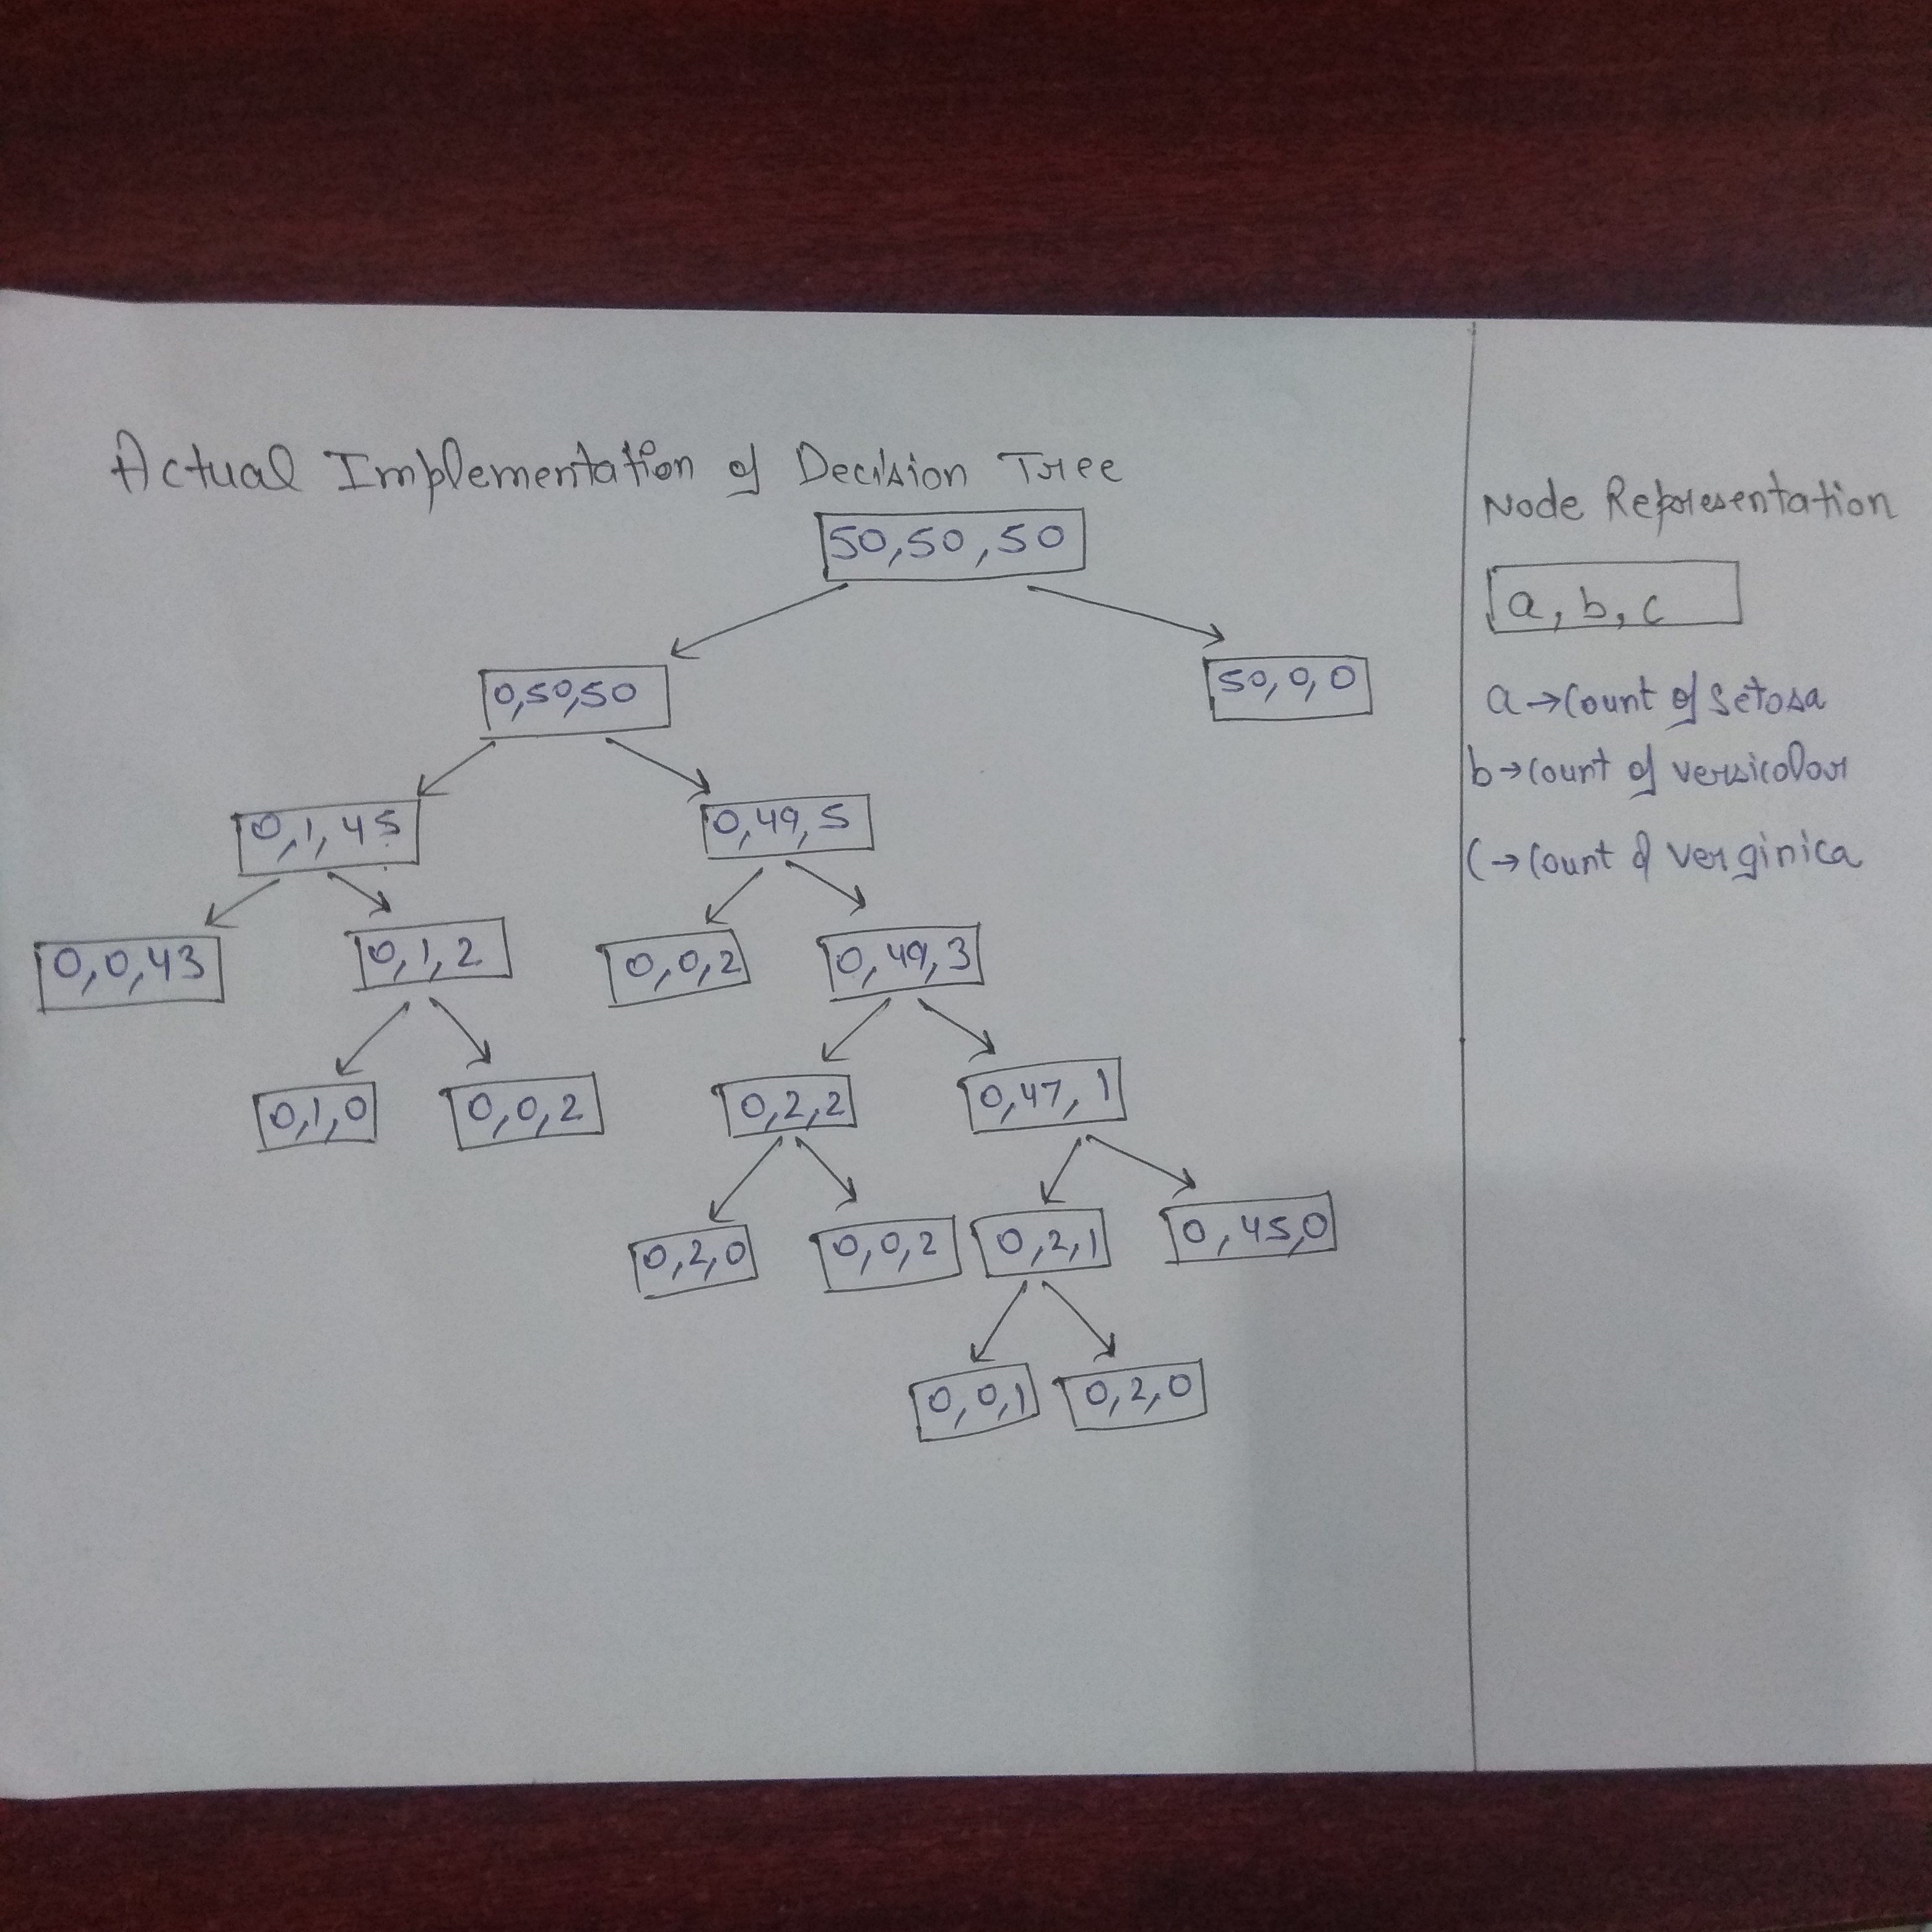

In [9]:
li=[]

for i in range(2):
    li.append(-1)
#root = create(li)
printbt1(root,"Root Node")
   


Root Node
Level :-  0
Entropy :-  1.584962500721156
Split_Feature :-  pw
Gain :-  0.9999999999999999

Left Node
Level :-  1
Entropy :-  1.0
Split_Feature :-  pw
Gain :-  0.6933647985912662

Left Node
Level :-  2
Entropy :-  0.15109697051711368
Split_Feature :-  pl
Gain :-  0.2622302372762406

Left Node
Level :-  3
Entropy :-  0.0
Split_Feature :-  Reached Leaf Node
Gain :-  0

Right Node
Level :-  3
Entropy :-  0.9182958340544896
Split_Feature :-  sw
Gain :-  1.0

Left Node
Level :-  4
Entropy :-  0.0
Split_Feature :-  Reached Leaf Node
Gain :-  0

Right Node
Level :-  4
Entropy :-  0.0
Split_Feature :-  Reached Leaf Node
Gain :-  0

Right Node
Level :-  2
Entropy :-  0.44506485705083865
Split_Feature :-  pl
Gain :-  0.6066178220203009

Left Node
Level :-  3
Entropy :-  0.0
Split_Feature :-  Reached Leaf Node
Gain :-  0

Right Node
Level :-  3
Entropy :-  0.31821529768323314
Split_Feature :-  pl
Gain :-  0.2720453440631924

Left Node
Level :-  4
Entropy :-  1.0
Split_Feature :-  pw
Gai